# Theoretical Foundations of Buffer Stock Saving

<cite data-cite="6202365/8AH9AXN2"></cite>

<p style="text-align: center;"><small><small><small>Generator: BufferStockTheory-make/notebooks_byname</small></small></small></p>

[![econ-ark.org](https://img.shields.io/badge/Powered%20by-Econ--ARK-3e8acc.svg)](https://econ-ark.org/materials/BufferStockTheory)


<a id='interactive-dashboard'></a>

[This notebook](https://econ-ark.org/BufferStockTheory/#launch) uses the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit to reproduce and illustrate key results of the paper [Theoretical Foundations of Buffer Stock Saving](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory).

An [interactive dashboard](https://econ-ark.org/BufferStockStockTheory/#Dashboard) allows you to modify parameters to see how the figures change.

(In JupyterLab, click on the $\bullet$$\bullet$$\bullet$ patterns to expose the runnable code)

In [1]:
# This cell does some setup

# Import required python packages
from HARK.utilities import plot_funcs
from builtins import breakpoint
import logging
from HARK.utilities import (find_gui, make_figs, determine_platform,
                            test_latex_installation, setup_latex_env_notebook)
from HARK.ConsumptionSaving.ConsIndShockModel import init_perfect_foresight
from HARK import __version__ as HARKversion
from HARK.ConsumptionSaving.ConsIndShockModel \
    import (PerfForesightConsumerType, IndShockConsumerType)
from scipy.optimize import newton as zero_point_of
import numpy as np
from copy import deepcopy

from HARK.ConsumptionSaving.ConsIndShockModel \
    import init_idiosyncratic_shocks as base_params

# Plotting tools
import matplotlib.pyplot as plt

# Ignore some harmless but alarming warning messages
import warnings
warnings.filterwarnings("ignore")

# breakpoint()
# Code to allow a master "Generator" and derived "Generated" versions
#   - allows "$nb-Problems-And-Solutions → $nb-Problems → $nb"
Generator = True  # Is this notebook the master or is it generated?

# Whether to save the figures to Figures_dir
saveFigs = True

# Whether to draw the figures
drawFigs = True

if HARKversion < '0.11.0':
    raise ImportError(
        'This notebook requires at least econ-ark v0.11.0.\n' +
        'Please update your installation:\n' +
        'pip install -U econ-ark or conda install -c conda-forge econ-ark')

pf = determine_platform()
try:
    latexExists = test_latex_installation(pf)
except ImportError:  # windows and MacOS requires manual install
    latexExists = False

setup_latex_env_notebook(pf, latexExists)

In [2]:
# check if GUI is present if not then switch drawFigs to False and force saveFigs to be True
if not find_gui():
    drawFigs = False
    saveFigs = True

# Font sizes for figures
fssml, fsmid, fsbig = 18, 22, 26

# this can be removed if we pass in saveFigs and drawFigs in
# every call to makeFig('figure')


def makeFig(figure_name, target_dir="../../Figures"):
    print('')
    make_figs(figure_name, saveFigs, drawFigs, target_dir)
    print('')

## [The Problem](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory/#The-Problem)

The paper defines and calibrates a small set of parameters:

\begin{align}
 &
\renewcommand{\APF}{\pmb{\unicode[0.55,0.05]{0x00DE}}}
\newcommand{\PatFac}{\pmb{\unicode[0.55,0.05]{0x00DE}}}
\newcommand{\PatRte}{\pmb{\unicode[0.55,0.05]{0x00FE}}}
\newcommand{\aLev}{\mathbf{a}}
\newcommand{\CRRA}{\rho}
\newcommand{\cLev}{\pmb{\mathrm{c}}}
\newcommand{\aNrm}{{a}}
\newcommand{\bNrm}{{b}}
\newcommand{\cNrm}{{c}}
\newcommand{\dNrm}{{d}}
\newcommand{\hNrm}{{h}}
\newcommand{\mNrm}{{m}}
\newcommand{\vNrm}{{v}}
\newcommand{\aLev}{\pmb{\mathrm{a}}}
\newcommand{\bLev}{\pmb{\mathrm{b}}}
\newcommand{\cLev}{\pmb{\mathrm{c}}}
\newcommand{\dLev}{\pmb{\mathrm{d}}}
\newcommand{\hLev}{\pmb{\mathrm{h}}}
\newcommand{\mLev}{\pmb{\mathrm{m}}}
\newcommand{\pLev}{\pmb{\mathrm{p}}}
\newcommand{\vLev}{\pmb{\mathrm{v}}}
\newcommand{\cFunc}{\mathrm{c}}
\newcommand{\uFunc}{\mathrm{u}}
\newcommand{\RNrm}{\mathcal{R}}
\newcommand{\DiscFac}{\beta}
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\IncUnemp}{\mu}
\newcommand{\MPC}{\kappa}
\newcommand{\PermGroFac}{\Gamma}
\newcommand{\PermGroFacAdj}{\tilde{\Gamma}}
\newcommand{\PermShkStd}{\sigma_\Psi}
\newcommand{\permShkStd}{\sigma_\psi}
\newcommand{\PermShk}{\Psi} % New
\newcommand{\permShk}{\psi} % New
\newcommand{\Rfree}{\mathsf{R}}
\newcommand{\Trg}{\hat}
\newcommand{\StE}{\check}
\newcommand{\Thorn}{\pmb{\TH}}
\newcommand{\TranShkStd}{\sigma_\Theta}
\newcommand{\TranShk}{\Theta}
\newcommand{\tranShk}{\theta}
\newcommand{\tranShkStd}{\sigma_{\theta}}
\newcommand{\UnempPrb}{\wp}
\newcommand\maththorn{\mathord{\pmb{\text{\TH}}}}
\end{align}

| Parameter | Description | Python Variable | Value |
|:---:      | :---:       | :---:  | :---: |
| $\PermGroFac$ | Permanent Income Growth Factor | $\texttt{PermGroFac}$ | 1.03 |
| $\Rfree$ | Interest Factor | $\texttt{Rfree}$ | 1.04 |
| $\DiscFac$ | Time Preference Factor | $\texttt{DiscFac}$ | 0.96 |
| $\CRRA$ | Coeﬃcient of Relative Risk Aversion| $\texttt{CRRA}$ | 2 |
| $\UnempPrb$ | Probability of Unemployment | $\texttt{UnempPrb}$ | 0.005 |
| $\tranShk^{\large u}$ | Income when Unemployed | $\texttt{IncUnemp}$ | 0. |
| $\permShkStd$ | Std Dev of Log Permanent Shock| $\texttt{PermShkStd}$ | 0.1 |
| $\TranShkStd$ | Std Dev of Log Transitory Shock| $\texttt{TranShkStd}$ | 0.1 |

that define the preferences and environment of microeconomic consumers as detailed below.

The objective of such a consumer with a horizon of $n$ periods is to maximize the value obtained from the stream of consumption __**c**__ from period $t=T-n$ to a terminal period $T$:

\begin{equation}
\mathbf{v}_{t} = \sum_{i=0}^{n} \DiscFac^{n}\mathrm{u}(\mathbf{c}_{t+n})
\end{equation}

The infinite-horizon solution is the limit of the first period solution $\mathrm{c}_{T-n}$ as the horizon $n$ goes to infinity.

### Details
For a microeconomic consumer who begins period $t$ with __**m**__arket resources boldface $\mLev_{t}$ (=net worth plus current income), the amount that remains after __**c**__onsumption of $\cLev_{t}$ will be end-of-period __**a**__ssets $\aLev_{t}$,

<!-- Next period's 'Balances' $B_{t+1}$ reflect this period's $\aLev_{t}$ augmented by return factor $R$:-->

\begin{eqnarray}
\aLev_{t}   &=&\mLev_{t}-\cLev_{t}. \notag
\end{eqnarray}

The consumer's __**p**__ermanent noncapital income $\pLev$ grows by a predictable factor $\PermGroFac$ and is subject to an unpredictable multiplicative shock $\Ex_{t}[\permShk_{t+1}]=1$,

\begin{eqnarray}
\pLev_{t+1} & = & \pLev_{t} \PermGroFac \permShk_{t+1}, \notag
\end{eqnarray}

and, if the consumer is employed, actual income is permanent income multiplied by a transitory shock $\tranShk^{\large e}$.  There is also a probability $\UnempPrb$ that the consumer will be temporarily unemployed and experience income of $\tranShk^{\large u}  = 0$.  We construct $\tranShk^{\large e}$ so that its mean value is $1/(1-\UnempPrb)$ because in that case the mean level of the transitory shock (accounting for both unemployed and employed states) is exactly

\begin{eqnarray}
\Ex_{t}[\tranShk_{t+1}] & = & \tranShk^{\large{u}}  \times \UnempPrb + (1-\UnempPrb) \times \Ex_{t}[\tranShk^{\large{e}}_{t+1}] \notag
\\ & = & 0 \times \UnempPrb + (1-\UnempPrb) \times 1/(1-\UnempPrb)  \notag
\\ & = & 1. \notag
\end{eqnarray}

  We can combine the unemployment shock $\tranShk^{\large u}$ and the transitory shock to employment income $\tranShk^{\large e}$ into $\tranShk _{t+1}$, so that next period's market resources are
\begin{eqnarray}
    \mLev_{t+1} &=& \aLev_{t}\Rfree +\pLev_{t+1}\tranShk_{t+1}.  \notag
\end{eqnarray}

When the consumer has a CRRA utility function $u(\cLev)=\frac{\cLev^{1-\CRRA}}{1-\CRRA}$, the paper shows that the problem can be written in terms of ratios (nonbold font) of level (bold font) variables to permanent income, e.g. $m_{t} \equiv \mLev_{t}/\pLev_{t}$, and the Bellman form of [the problem reduces to](https://econ-ark.github.io/BufferStockTheory/#The-Related-Problem):

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t}~~ u(c_t) + \DiscFac~\Ex_{t} [(\PermGroFac\permShk_{t+1})^{1-\CRRA} v_{t+1}(m_{t+1}) ] \\
& s.t. & \\
a_t &=& m_t - c_t \\
m_{t+1} &=& a_t \Rfree/(\PermGroFac \permShk_{t+1}) + \tranShk_{t+1} \\
\end{eqnarray*}

In [3]:
# Import default parameter values (init_idiosyncratic_shock)

# Set the parameters for the baseline results in the paper
# using the variable names defined in the cell above
base_params['PermGroFac'] = [1.03]  # Permanent income growth factor
base_params['Rfree'] = Rfree = 1.04  # Interest factor on assets
base_params['DiscFac'] = DiscFac = 0.96  # Time Preference Factor
base_params['CRRA'] = CRRA = 2.00  # Coefficient of relative risk aversion
# Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['UnempPrb'] = UnempPrb = 0.005
base_params['IncUnemp'] = IncUnemp = 0.0   # Induces natural borrowing constraint
base_params['permShkStd'] = [0.1]   # Standard deviation of log permanent income shocks
base_params['tranShkStd'] = [0.1]   # Standard deviation of log transitory income shocks

In [4]:
# Uninteresting housekeeping and details
# Make global variables for the things that were lists above -- uninteresting housekeeping
PermGroFac, permShkStd, tranShkStd = base_params['PermGroFac'][0], base_params['permShkStd'][0], base_params['tranShkStd'][0]

# Some technical settings that are not interesting for our purposes
base_params['LivPrb'] = [1.0]   # 100 percent probability of living to next period
base_params['CubicBool'] = True    # Use cubic spline interpolation
base_params['T_cycle'] = 1       # No 'seasonal' cycles
base_params['BoroCnstArt'] = None    # No artificial borrowing constraint

## Convergence of the Consumption Rules

Under the given parameter values, [the paper's first figure](https://econ-ark.github.io/BufferStockTheory/#Convergence-of-the-Consumption-Rules) depicts the successive consumption rules that apply in the last period of life $(c_{T}(m))$, the second-to-last period, and earlier periods $(c_{T-n})$.  The consumption function to which these converge is $c(m)$:

$
c(m) = \lim_{n \uparrow \infty} c_{T-n}(m) \notag
$

In [5]:
# Create a buffer stock consumer instance by invoking the IndShockConsumerType class
# with the built-in parameter dictionary "base_params"

periods_to_solve = 100

# Construct finite horizon agent with baseline parameters
baseAgent_Fin = \
    IndShockConsumerType(**base_params,
                         horizon='finite',
                         cycles=periods_to_solve)

baseAgent_Fin.solve(quietly=False)  # Solve the model


# baseAgent_Fin.unpack('cFunc')  # Make cFunc easily accessible
baseAgent_Fin.unpack('cFunc')
cFunc = baseAgent_Fin.cFunc

.....................................................................................................


Saving figure cFuncsConverge in ../../Figures


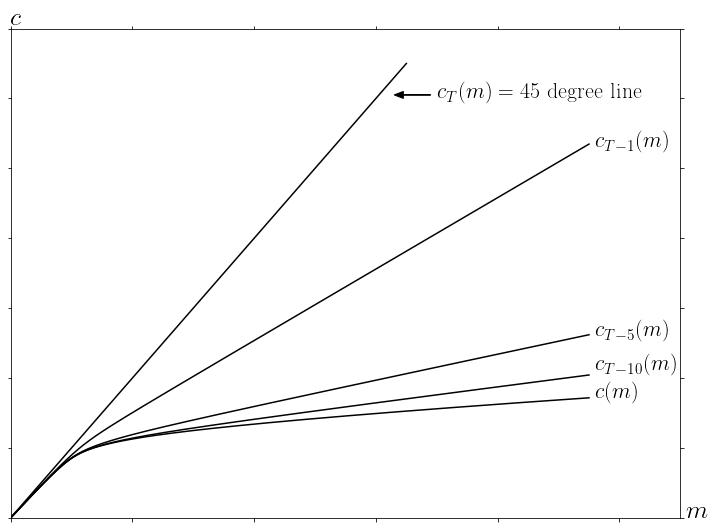

In [6]:
# Plot the different consumption rules for the different periods

mPlotMin = 0
mLocCLabels = 9.6  # Defines horizontal limit of figure
mPlotTop = 6.5    # Defines maximum m value where functions are plotted
mPts = 1000      # Number of points at which functions are evaluated

mBelwLabels = np.linspace(mPlotMin, mLocCLabels-0.1, mPts)  # Range of m below loc of labels
m_FullRange = np.linspace(mPlotMin, mPlotTop, mPts)        # Full plot range
# c_Tm0  defines the last period consumption rule (c=m)
c_Tm0 = m_FullRange
# c_Tm1 defines the second-to-last period consumption rule
c_Tm1 = cFunc[-2](mBelwLabels)
c_Tm5 = cFunc[-6](mBelwLabels)  # c_Tm5 defines the T-5 period consumption rule
c_Tm10 = cFunc[-11](mBelwLabels)  # c_Tm10 defines the T-10 period consumption rule
# c_Limt defines limiting inﬁnite-horizon consumption rule
c_Limt = baseAgent_Fin.cFunc[0](mBelwLabels)
plt.figure(figsize=(12, 9))
plt.plot(mBelwLabels, c_Limt, color="black")
plt.plot(mBelwLabels, c_Tm1, color="black")
plt.plot(mBelwLabels, c_Tm5, color="black")
plt.plot(mBelwLabels, c_Tm10, color="black")
plt.plot(m_FullRange, c_Tm0, color="black")
plt.xlim(0, 11)
plt.ylim(0, 7)
plt.text(7.0, 6.0, r'$c_{T   }(m) = 45$ degree line', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 5.3, r'$c_{T-1 }(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 2.6, r'$c_{T-5 }(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 2.1, r'$c_{T-10}(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 1.7, r'$c(m)       $', fontsize=22, fontweight='bold')
plt.arrow(6.9, 6.05, -0.6, 0, head_width=0.1, width=0.001,
          facecolor='black', length_includes_head='True')
plt.tick_params(labelbottom=False, labelleft=False, left='off',
                right='off', bottom='off', top='off')
plt.text(0, 7.05, "$c$", fontsize=26)
plt.text(11.1, 0, "$m$", fontsize=26)
# Save the figures in several formats

makeFig('cFuncsConverge')  # Comment out if you want to run uninterrupted

Use the [interactive dashboard](#interactive-dashboard) to explore the effects of changes in patience, risk aversion, or risk

## Factors and Conditions

### [The Finite Human Wealth Condition](http://econ-ark.github.io/BufferStockTheory/#Human-Wealth)

Human wealth for a perfect foresight consumer is the present discounted value of future income:

\begin{eqnarray}\notag
\hLev_{t} & = & \Ex_{t}[\pLev_{t} + \Rfree^{-1} \pLev_{t+1} + \Rfree^{2} \pLev_{t+2} ... ] \\ \notag
      & = & \pLev_{t} \left(1 + (\PermGroFac/\Rfree) + (\PermGroFac/\Rfree)^{2} ... \right)
\end{eqnarray}

which approaches infinity as the horizon extends if $\PermGroFac/\Rfree \geq 1$.  We say that the 'Finite Human Wealth Condition' [(FHWC)](https://econ-ark.github.io/BufferStockTheory/#FHWC) holds if
$0 \leq (\PermGroFac/\Rfree) < 1$.

### [Absolute Patience and the AIC](https://econ-ark.github.io/BufferStockTheory/#AIC)

The paper defines the Absolute Patience Factor [(APF)](https://econ-ark.github.io/BufferStockTheory/#APF) as being equal to the ratio $\cLev_{t+1}/\cLev_{t}$ for a perfect foresight consumer.  (The Old English character Thorn used for this object in the paper cannot reliably be rendered in Jupyter notebooks; it may appear as capital Phi):

\begin{equation}
\PatFac = (\Rfree \DiscFac)^{1/\CRRA}
\end{equation}

If $\APF = 1$, a perfect foresight consumer will spend at exactly the level of $\cLev$ that can be sustained perpetually (given their current and future resources).  If $\APF < 1$ (the consumer is 'absolutely impatient'; or, 'the absolute impatience condition holds'), the consumer is consuming more than the sustainable amount, so consumption will fall, and if the consumer is 'absolutely patient' with $\APF > 1$ consumption will grow over time.



### [Growth Patience and the GICRaw](https://econ-ark.github.io/BufferStockTheory/#GIC)

For a [perfect foresight consumer](https://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/consumption/PerfForesightCRRA), whether the ratio $c$=__**c**__/__**p**__ is rising, constant, or falling depends on the relative growth rates of consumption and permanent income; that ratio is measured by the [Perfect Foresight Growth Patience Factor](https://econ-ark.github.io/BufferStockTheory/#PFGPF):

\begin{eqnarray}
\APF_{\PermGroFac} & = & \APF/\PermGroFac
\end{eqnarray}
and whether the $c$ is falling or rising over time depends on whether $\APF_{\PermGroFac}$ is below or above 1.

An analogous condition can be defined when there is uncertainty about permanent income.  Defining $\tilde{\PermGroFac} = (\Ex[\permShk^{-1}])^{-1}\PermGroFac$, the
['Growth Impatience Condition'](https://econ-ark.github.io/BufferStockTheory/#GIC) determines whether, _in expectation_, the stochastic value of $c$ is rising, constant, or falling over time:

\begin{eqnarray}
  \APF/\tilde{\PermGroFac} & < & 1.
\end{eqnarray}

### [The Finite Value of Autarky Condition (FVAC)](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value)

The paper [shows](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value) that a consumer who planned to spend his permanent income $\{ \pLev_{t}, \pLev_{t+1}, ...\} $ in every period would have value defined by

\begin{equation*}
\vLev_{t}^{\text{autarky}} = \uFunc(\pLev_{t})\left(\frac{1}{1-\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}]}\right)
\end{equation*}

and defines the ['Finite Value of Autarky Condition'](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value) as the requirement that the denominator be a positive finite number:

\begin{equation*}
\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}] < 1
\end{equation*}

### [The Weak Return Impatience Condition (WRIC)](https://econ-ark.github.io/BufferStockTheory/#WRIC)

The [Return Impatience Condition](https://econ-ark.github.io/BufferStockTheory/#RIC) $\APF/\Rfree < 1$ has long been understood to be required for the perfect foresight model to have a nondegenerate solution (a common special case is when $\CRRA=1$; in this case $\APF = \Rfree \DiscFac$ so $\APF<1$ reduces to the familiar condition $\DiscFac < \Rfree$).

If the RIC does not hold, the consumer is so patient that the optimal consumption function approaches zero as the horizon extends indefinitely.

When the probability of unemployment is $\UnempPrb$, the paper articulates an analogous (but weaker) condition:

\begin{eqnarray}
 \UnempPrb^{1/\CRRA} \APF/\Rfree & < & 1
\end{eqnarray}

# Key Results

## [Nondegenerate Solution Requires FVAC and WRIC](https://econ-ark.github.io/BufferStockTheory/#Sufficient-Conditions-For-Nondegenerate-Solution)

A main result of the paper is that the conditions required for the model to have a nondegenerate limiting solution ($0 < c(m) < \infty$ for feasible $m$) are that the Finite Value of Autarky (FVAC) and Weak Return Impatience Condition (WRIC) hold.

## [Natural Borrowing Constraint limits to Artificial Borrowing Constraint](https://econ-ark.github.io/BufferStockTheory/#The-Liquidity-Constrained-Solution-as-a-Limit)

Defining $\chi(\UnempPrb)$ as the consumption function associated with any particular probability of a zero-income shock $\UnempPrb$, and defining $\hat{\chi}$ as the consumption function that would apply in the absence of the transitory zero-income shocks but in the presence of an 'artificial' borrowing constraint requiring $a \geq 0$ (_a la_ Deaton (1991)), the paper shows that

\begin{eqnarray}
\lim_{\UnempPrb \downarrow 0}~\chi(\UnempPrb) & = & \hat{\chi}
\end{eqnarray}

That is, as $\UnempPrb$ approaches zero the problem with uncertainty becomes identical to the problem that instead has constraints.  (See [Precautionary Saving and Liquidity Constraints](https://econ-ark.github.io/LiqConstr) for a full treatment of the relationship between precautionary saving and liquidity constraints).

## [$\cFunc(m)$ can be Finite Even When Human Wealth Is Infinite](https://econ-ark.github.io/BufferStockTheory/#When-The-GICRaw-Fails)

In the perfect foresight model, if $\Rfree < \PermGroFac$ the PDV of future labor income approaches infinity as the horizon extends and so the limiting consumption function is $c(m) = \infty$ for all $m$.  Many models have no well-defined limiting solution when human wealth is infinite.

The presence of uncertainty changes this: Even when limiting human wealth is infinite, the limiting consumption function is finite for all values of $m$.

This is because uncertainty imposes a "natural borrowing constraint" that deters the consumer from borrowing against their unbounded (but uncertain) future labor income.

A [table](https://econ-ark.github.io/BufferStockTheory/#Sufficient-Conditions-For-Nondegenerate-Solution) puts this result in the context of implications of other conditions and restrictions.



For a given $m_{t}$ what is the $c_t$ ($=\rightarrow a_{t}$) such that for that $a_{t}$ we have that

\begin{align}
E_{t}[m_{t+1}-m_{t}] & < 0  \\
E_{t}[(\Rfree/(\PermGroFac \permShk_{t+1})) (m_{t}-c(m_{t}))]+1 & < m_{t} \\
(\Rfree/(\PermGroFac )) a_{t}E_{t}[(1/\permShk_{t+1})]+1 & < m_{t} \\
(m_{t}-\mathrm{c}_{t}(m_{t}))\bar{\mathcal{R}}+1 & < m_{t} \\
m_{t}(1-1/\bar{\mathcal{R}})+1 & < \mathrm{c}_{t}(m_{t})
\end{align}


## [Unique and Stable Values of $\mNrm$](https://econ-ark.github.io/BufferStockTheory/#Unique-Stable-Points)

Assuming that the **FVAC** and **WRIC** hold so that the problem has a nondegenerate solution, under more stringent conditions its dynamics can also be shown to exhibit certain kinds of stability.  Two particularly useful kinds of stability are existence of a 'target' value of market resources $\Trg{\mNrm}$ and a 'pseudo-steady-state' value $\StE{\mNrm}$.

### [If the GIC-Nrm Holds, $\exists$ a finite 'target' $\mNrm$](https://econ-ark.github.io/BufferStockTheory/#onetarget)

Section [Individual Target Wealth](https://econ-ark.github.io/BufferStockTheory/#onetarget) shows that, under parameter values for which the limiting consumption function exists, if the [GICNrm](https://econ-ark.github.io/BufferStockTheory/#GICNrm) holds then there will be a value $\Trg{m}$ such that:

\begin{eqnarray*}
\Ex[m_{t+1}] & > & m_{t}~\text{if $m_{t} < \Trg{m}$} \\
\Ex[m_{t+1}] & < & m_{t}~\text{if $m_{t} > \Trg{m}$} \\
\Ex[m_{t+1}] & = & m_{t}~\text{if $m_{t} = \Trg{m}$}
\end{eqnarray*}

[An equation](https://econ-ark.github.io/BufferStockTheory/#mTargImplicit) in the paper tells us that, for the expected normalized interest factor $\bar{\RNrm}=\mathbb{E}[\Rfree/(\PermGroFac \PermShk)]$, if $\mNrm_{t}=\Trg{m}$ then:

\begin{align}
(\Trg{\mNrm}-\cFunc(\Trg{\mNrm}))\bar{\RNrm}+1 & = \Trg{\mNrm}
%\\ \Trg{\mNrm}(1-\bar{\RNrm}^{-1})+\bar{\RNrm}^{-1} & = \Trg{\cNrm}
%\\ \Trg{\cNrm} & = \Trg{\mNrm} - (\Trg{\mNrm} - 1)\bar{\RNrm}^{-1}
\end{align}

which can be solved numerically for the unique $\mNrm$ that satisfies it.

### [If the GIC Holds, $\exists$ a finite 'pseudo-steady-state' $\mNrm$](https://econ-ark.github.io/BufferStockTheory/#Collective-Stability)

Section [Collective Stability and the Pseudo-Steady-State](https://econ-ark.github.io/BufferStockTheory/#Collective-Stability) shows that, under parameter values for which the limiting consumption function exists, if the **GIC** holds then there will be a value $\StE{m}$ such that:

\begin{eqnarray*}
\Ex_{t}[\mLev_{t+1}/\mLev_{t}] & > & \PermGroFac~\text{if $m_{t} < \StE{m}$} \\
\Ex_{t}[\mLev_{t+1}/\mLev_{t}] & < & \PermGroFac~\text{if $m_{t} > \StE{m}$} \\
\Ex_{t}[\mLev_{t+1}/\mLev_{t}] & = & \PermGroFac~\text{if $m_{t} = \StE{m}$}
\end{eqnarray*}

[An equation](https://econ-ark.github.io/BufferStockTheory/#balgrostableSolve) in the paper tells us that if $\mNrm_{t}=\StE{m}$ then:

\begin{align}
(\StE{\mNrm}-\cFunc(\StE{\mNrm}))\RNrm+1 & = \StE{\mNrm}
\end{align}

which can be solved numerically for the unique $\StE{\mNrm}$ that satisfies it.


### [Example With Finite Pseudo-Steady-State But Infinite Target Wealth](https://econ-ark.github.io/BufferStockTheory/#GICNrmFailsButGICRawHolds)

[A figure](https://econ-ark.github.io/BufferStockTheory/#GICNrmFailsButGICRawHolds) depicts a solution when the **FVAC** (Finite Value of Autarky Condition) and **WRIC** hold (so that the model has a solution), the **GIC** holds, so the model has a pseudo-steady-state $\StE{\mNrm}$, but the **GIC-Nrm** fails, so the model does not have an individual target wealth ratio $\Trg{\mNrm}$ (or, rather, the target wealth ratio is infinity, as can be seen by the fact that the level of $\cNrm$ is always below the level that would keep $\Ex_{t}[\Delta \mNrm_{t+1}] = 0$).

This example was constructed by quadrupling the variance of the permanent shocks from the baseline parameterization.  The extra precautionary saving induced by increased uncertainty is what pushes the agent into the region without a target wealth ratio.

In [7]:
# GICNrmFailsButGICRawHolds Example
GICNrmFailsButGICRawHolds_params = dict(base_params)

# Increase patience by increasing risk
GICNrmFailsButGICRawHolds_params['permShkStd'] = [0.2]

# Create an agent with these parameters
GICNrmFailsButGICRawHolds = \
    IndShockConsumerType(**GICNrmFailsButGICRawHolds_params,
                         quietly=False,  # If true, output would be suppressed
                         )

.

In [8]:
# Solve the model for these parameter values
GICNrmFailsButGICRawHolds.tolerance = 0.0000001
GICNrmFailsButGICRawHolds.tolerance = 100
GICNrmFailsButGICRawHolds.solve(
    quietly=True,  # Suppress output
)

# Because we are trying to solve a problem very close to the critical patience
# values, we want to do it with extra precision to be sure we've gotten the
# answer right.  We can retrieve the distance between the last two solutions:

distance_original = GICNrmFailsButGICRawHolds.solution[0].distance_last

# But high precision would have slowed things down if we used it from the start

# Instead, we can take the solution obtained above, and continue it but with
# parameters that will yield a more precise answer:

# Solve with quadruple the normal range
GICNrmFailsButGICRawHolds.aXtraMax = GICNrmFailsButGICRawHolds.aXtraMax * 10

# Solve over four times as many gridpoints
GICNrmFailsButGICRawHolds.aXtraCount = GICNrmFailsButGICRawHolds.aXtraCount * 2

GICNrmFailsButGICRawHolds.update_assets_grid()

# Solve to a 10 times tighter degree of error tolerance
GICNrmFailsButGICRawHolds.tolerance = GICNrmFailsButGICRawHolds.tolerance/10

# When the solver reaches its tolerance threshold, it changes the solver
# attribute stge_kind to have 'iter_status' of 'finished'
# If we want to continue the solution (having changed something, as above)
# To continue the solution from where we left off, we just change the
# we just change 'iter_status' to 'iterator' and tell it to ".solve()" again

GICNrmFailsButGICRawHolds.solution[0].stge_kind['iter_status'] = 'iterator'
# continue solving

# Setting messaging_level to NOTSET prints all info including progress
GICNrmFailsButGICRawHolds.solve(messaging_level=logging.NOTSET, quietly=False)

# Test whether the new solution meets a tighter tolerance than before:
distance_now = GICNrmFailsButGICRawHolds.solution[0].distance_last
print('\ndistance_now < distance_original: ' +
      str(distance_now < distance_original))

Finished cycle # 000003 in  0.023331 seconds, solution distance = 4.800e+01
Finished cycle # 000004 in  0.047791 seconds, solution distance = 1.696e+01
Finished cycle # 000005 in  0.069372 seconds, solution distance = 1.016e+01
Finished cycle # 000006 in  0.092583 seconds, solution distance = 6.761e+00

distance_now < distance_original: True


In [9]:

# Again increase the range
GICNrmFailsButGICRawHolds.aXtraMax = GICNrmFailsButGICRawHolds.aXtraMax * 10

# and gridpoints
GICNrmFailsButGICRawHolds.aXtraCount = GICNrmFailsButGICRawHolds.aXtraCount * 2

GICNrmFailsButGICRawHolds.update_assets_grid()

# and decrease error tolerance
GICNrmFailsButGICRawHolds.tolerance = GICNrmFailsButGICRawHolds.tolerance/10


GICNrmFailsButGICRawHolds.solution[0].stge_kind['iter_status'] = 'iterator'
# continue solving

# continue
GICNrmFailsButGICRawHolds.solve(messaging_level=logging.NOTSET, quietly=False)

# Test whether the new solution meets a tighter tolerance than before:
distance_now = GICNrmFailsButGICRawHolds.solution[0].distance_last
print('\ndistance_now < distance_original: ' +
      str(distance_now < distance_original))

Finished cycle # 000007 in  0.026168 seconds, solution distance = 9.600e+01
Finished cycle # 000008 in  0.053524 seconds, solution distance = 3.615e+01
Finished cycle # 000009 in  0.081369 seconds, solution distance = 2.805e+01
Finished cycle # 000010 in  0.106596 seconds, solution distance = 2.239e+01
Finished cycle # 000011 in  0.134225 seconds, solution distance = 1.826e+01
Finished cycle # 000012 in  0.158886 seconds, solution distance = 1.517e+01
Finished cycle # 000013 in  0.186507 seconds, solution distance = 1.280e+01
Finished cycle # 000014 in  0.213902 seconds, solution distance = 1.093e+01
Finished cycle # 000015 in  0.241118 seconds, solution distance = 9.433e+00
Finished cycle # 000016 in  0.266049 seconds, solution distance = 8.219e+00
Finished cycle # 000017 in  0.289899 seconds, solution distance = 7.220e+00
Finished cycle # 000018 in  0.312732 seconds, solution distance = 6.387e+00
Finished cycle # 000019 in  0.336396 seconds, solution distance = 5.686e+00
Finished cyc


Saving figure GICNrmFailsButGICRawHolds in ../../Figures


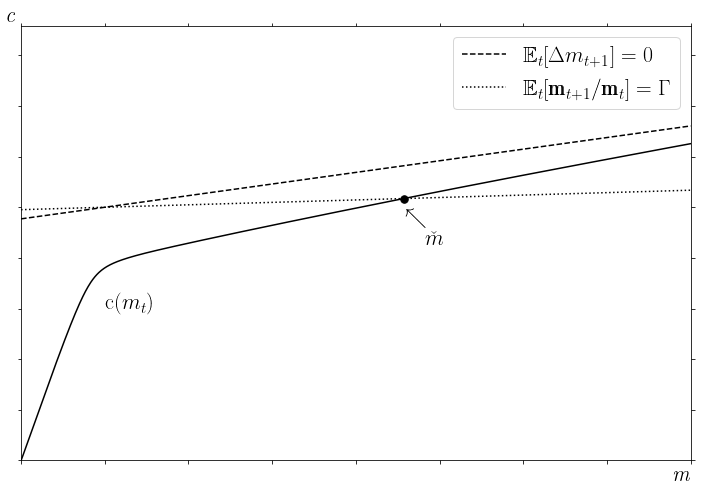


Finite mNrmStE but infinite mNrmTrg


In [10]:
# Plot GICNrmFailsButGICRawHolds

soln = GICNrmFailsButGICRawHolds.solution[0]  # Short alias for solution

Bilt, Pars, E_tp1_ = soln.Bilt, soln.Pars, soln.E_Next_

fig, ax = plt.subplots(figsize=(12, 8))

[xMin, xMax] = [0.0, 8.0]
yMin = 0.0
yMax = E_tp1_.c_where_E_Next_m_tp1_minus_m_t_eq_0(xMax)*1.3

mPltVals = np.linspace(xMin, xMax, mPts)

if latexExists:
    c_Stable_Ind_txt = "$\Ex_{t}[\Delta m_{t+1}] = 0$"
    c_Stable_Agg_txt = "$\Ex_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}] = \PermGroFac$"
else:
    c_Stable_Ind_txt = "$\mathsf{E}_{t}[\Delta m_{t+1}] = 0$"
    c_Stable_Agg_txt = "$\mathsf{E}_{t}[\mathbf{m}_{t+1}/\mathbf{m}_{t}] = \PermGroFac$"

cVals_Lmting_color = "black"
c_Stable_Agg_color = "black"  # "blue"
c_Stable_Ind_color = "black"  # "red"

cVals_Lmting = Bilt.cFunc(mPltVals)
c_Stable_Ind = E_tp1_.c_where_E_Next_m_tp1_minus_m_t_eq_0(mPltVals)
c_Stable_Agg = E_tp1_.c_where_E_Next_permShk_times_m_tp1_minus_m_t_eq_0(
    mPltVals)

cVals_Lmting_lbl, = ax.plot(mPltVals, cVals_Lmting, color=cVals_Lmting_color)
c_Stable_Ind_lbl, = ax.plot(mPltVals, c_Stable_Ind,
                            color=c_Stable_Ind_color, linestyle="dashed", label=c_Stable_Ind_txt)
c_Stable_Agg_lbl, = ax.plot(mPltVals, c_Stable_Agg,
                            color=c_Stable_Agg_color, linestyle="dotted", label=c_Stable_Agg_txt)

ax.set_xlim(xMin, xMax)
ax.set_ylim(yMin, yMax)
ax.set_xlabel("$\mathit{m}$", fontweight='bold', fontsize=fsmid, loc="right")
ax.set_ylabel("$\mathit{c}$", fontweight='bold', fontsize=fsmid, loc="top", rotation=0)
# plt.text(xMin,yMax+0.03, "$c$", fontsize=26)
# plt.text(xMax-0.05,yMin, "$m$", fontsize=26)
ax.tick_params(labelbottom=False, labelleft=False, left='off',
               right='off', bottom='off', top='off')

#ax.arrow(0.98, 0.62, -0.2, 0, head_width=0.02, width=0.001,facecolor='black', length_includes_head='True')
#ax.arrow(2.2, 1.2, 0.3, -0.05, head_width=0.02, width=0.001,facecolor='black', length_includes_head='True')

ax.legend(handles=[c_Stable_Ind_lbl, c_Stable_Agg_lbl])
ax.legend(prop=dict(size=fsmid))

starting_search_at_m_t = 1.0
mNrmStE = \
    zero_point_of(E_tp1_.permGroShk_tp1_times_m_tp1_minus_m_t,
                  starting_search_at_m_t)
#mNrmStE = soln.mNrmStE
cNrmStE = c_Stable_Agg = E_tp1_.permGroShk_times_m_tp1_minus_m_t_eq_0(
    mNrmStE)
#mNrmStE_lbl, = ax.plot([mNrmStE,mNrmStE],[yMin,yMax],color="green",linestyle="--",label='Pseudo-Steady-State: $\mathbb{E}_{t}[\pmb{m}_{t+1}/\pmb{m}_{t}]=\Gamma$')

ax.plot(mNrmStE, cNrmStE, marker=".", markersize=15, color="black")  # Dot at StE point
ax.text(1, 0.6, "$\mathrm{c}(m_{t})$", fontsize=fsmid)  # label cFunc

if latexExists:
    ax.text(mNrmStE+0.02, cNrmStE-0.10, r"$\nwarrow$", fontsize=fsmid)
    ax.text(mNrmStE+0.25, cNrmStE-0.18, r"$\StE{m}~$", fontsize=fsmid)
else:
    ax.text(mNrmStE+0.02, cNrmStE-0.10, r"$\nwarrow$", fontsize=fsmid)
    ax.text(mNrmStE+0.25, cNrmStE-0.18, r"$\StE{m}~$", fontsize=fsmid)

makeFig('GICNrmFailsButGICRawHolds')
print('Finite mNrmStE but infinite mNrmTrg')

In the [interactive dashboard](#interactive-dashboard), see what happens as changes in the time preference rate (or changes in risk $\permShkStd$) change the consumer from _normalized-growth-patient_ $(\APF > \tilde{\PermGroFac})$ to _normalized-growth-impatient_ ($\APF < \tilde{\PermGroFac}$)

As a foundation for the remaining figures, we define another instance of the class $\texttt{IndShockConsumerType}$, which has the same parameter values as the instance $\texttt{baseAgent}$ defined previously but is solved to convergence (our definition of an infinite horizon agent type) instead of only 100 periods

In [11]:
# Find the infinite horizon solution

base_params['aXtraCount'] = base_params['aXtraCount'] * 20
base_params['CubicBool'] = False
baseAgent_Inf = IndShockConsumerType(
    cycles=0    # Infinite horizon
    , **base_params, quietly=True)  # construct it silently

### [Target $m$, Expected Consumption Growth, and Permanent Income Growth](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#AnalysisoftheConvergedConsumptionFunction)

The next figure, [Analysis of the Converged Consumption Function](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cGroTargetFig), shows expected growth factors for the levels of consumption $\cLev$ and market resources $\mLev$ as a function of the market resources ratio $\mNrm$ for a consumer behaving according to the converged consumption rule, along with the growth factor for an unconstrained perfect foresight consumer which is constant at $\APF$ and the growth factor for permanent income which is constant at $\PermGroFac$.

The growth factor for consumption can be computed without knowing the _level_ of the consumer's permanent income:

\begin{eqnarray*}
\Ex_{t}[\cLev_{t+1}/\cLev_{t}] & = & \Ex_{t}\left[\frac{\pLev_{t+1}\cFunc(m_{t+1})}{\pLev_{t}\cFunc(m_{t})}\right] \\
% & = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \pLev_{t}}{\pLev_{t}}\frac{\cFunc(m_{t+1})}{\cFunc(m_{t})}\right] \\
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \cFunc(m_{t+1})}{\cFunc(m_{t})}\right]
\end{eqnarray*}

and similarly the growth factor for market resources is:

\begin{eqnarray*}
\Ex_{t}[\mLev_{t+1}/\mLev_{t}]
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \mNrm_{t+1}}{\mNrm_{t}}\right]
\\ & = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \bNrm_{t+1}+\tranShk_{t+1}}{\mNrm_{t}}\right]
\\ & = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} (\aNrm_{t}\Rfree/(\PermGroFac \permShk_{t+1}))+\tranShk_{t+1}}{\mNrm_{t}}\right]
\\ & = & \Ex_{t}\left[\frac{\aNrm_{t}\Rfree+\tranShk_{t+1}}{\mNrm_{t}}\right]
\\ & = & \Ex_{t}\left[\frac{\aNrm_{t}\Rfree+1}{\mNrm_{t}}\right]
\end{eqnarray*}



\begin{eqnarray*}
\Ex_{t}[m_{t+1}-m_{t}]
& = & \Ex_{t}\left[(m_{t}-c_{t})(\Rfree/(\permShk_{t+1}\PermGroFac)) +\tranShk_{t+1}\right] - m_{t} \\
& = & (m_{t}-c_{t})\Rfree\Ex_{t}\left[\permShk^{-1}_{t+1}\PermGroFac\right] +1 - m_{t} \\
& = & a_{t}\Rfree\Ex_{t}\left[\permShk^{-1}_{t+1}\PermGroFac\right] +1 - m_{t}
\end{eqnarray*}

\begin{eqnarray*}
\Ex_{t}[\mLev_{t+1}/(p_{t}\PermGroFac \permShk_{t+1})/(\mLev_{t}/p_{t})]
& = & \Ex_{t}\left[\frac{\mLev_{t+1}/(\PermGroFac \permShk_{t+1})}{\mLev_{t}}\right] \\
& = & \Ex_{t}\left[\frac{(m_{t}-c_{t})(\Rfree/(\permShk_{t+1}\PermGroFac)) +\tranShk_{t+1}}{m_{t}}\right] \\
& = & \Ex_{t}\left[\frac{a_{t}(\Rfree/(\permShk_{t+1}\PermGroFac) - \Rfree + \Rfree) +1}{m_{t}}\right] \\
& = & (a_{t}/m_{t})\Rfree\Ex_{t}\left[1/(\permShk_{t+1}\PermGroFac)- 1)\right]+ \Ex_{t}[\mLev_{t+1}/\mLev_{t}] \\
\lim_{m_{t} \uparrow \infty}  & = & \PatR (\bar{\psi} - 1) + \PermGro
\end{eqnarray*}



In [12]:
# Solve baseline parameters agent
#base_params['CubicBool'] = False
tweaked_params = deepcopy(base_params)
tweaked_params['DiscFac'] = 0.970  # Tweak baseline parameter to make figure readable
baseAgent_Inf = IndShockConsumerType(
    cycles=0    # Infinite horizon
    , **tweaked_params, quietly=True)  # construct it silently

baseAgent_Inf.solve(
    quietly=False, messaging_level=logging.INFO)  # Solve it with info

.............................................................................................................


(quietly=False and messaging_level < logging.WARNING, so some model information is provided below):

The model has the following parameter values:

	DiscFac: 0.97
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	IncShkDstn: <HARK.distribution.DiscreteDistribution object at 0x1393c1f40>
	permShkDstn: <HARK.distribution.DiscreteDistribution object at 0x1393c16d0>
	tranShkDstn: <HARK.distribution.DiscreteDistribution object at 0x139393400>
	BoroCnstArt: None
	MaxKinks: None
	solverType: HARK
	solveMethod: EGM
	eventTiming: EOP
	horizon: infinite
	args: ()

The model's transition equations are:

chosen_to_next_choice step:
	kNrm = aNrm
	RNrm = Rfree / (PermGroFac * permShk)
	bNrm = kNrm * RNrm
	yNrm = tranShk
	mNrm = bNrm + yNrm

choice_to_chosen step:
	aNrm = mNrm - cNrm


Because messaging_level is >= logging.INFO, infinite horizon conditions are reported below:


The Absolute Patience Factor, APF=1.00439 violates the Absolute Impatience Condition (AIC), APF < 1:
    https://econ

.


Saving figure cGroTargetFig in ../../Figures


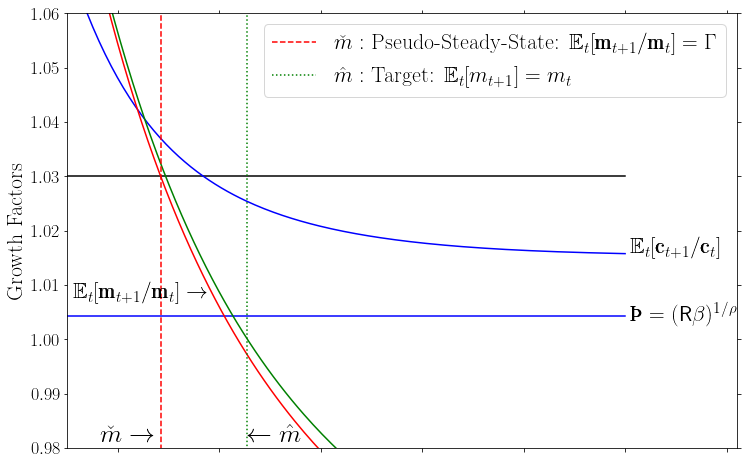

In [13]:
# Plot growth rates

soln = baseAgent_Inf.solution[0]        # shorthand
Bilt, Pars, E_Next_ = soln.Bilt, soln.Pars, soln.E_Next_  # shorthand
# Retrieve parameters (makes code more readable)
Rfree, DiscFac, CRRA, G = Pars.Rfree, Pars.DiscFac, Pars.CRRA, Pars.PermGroFac

color_cons, color_mrktLev, color_mrktRat, color_perm = "blue", "red", "green", "black"

mPlotMin, mCalcMax, mPlotMax = 0.0, 50, 2.20

# Get StE and target values
mNrmStE, mNrmTrg = Bilt.mNrmStE, Bilt.mNrmTrg

pts_num = 200  # Plot this many points

m_pts = np.linspace(1, mPlotMax, pts_num)   # values of m for plot
c_pts = soln.cFunc(m_pts)                   # values of c for plot
a_pts = m_pts - c_pts                       # values of a

Ex_cLev_tp1_Over_pLev_t = [
    soln.E_Next_.cLev_tp1_Over_pLev_t_from_a_t(a) for a in a_pts]
Ex_mLev_tp1_Over_pLev_t = [
    soln.E_Next_.mLev_tp1_Over_pLev_t_from_a_t(a) for a in a_pts]
Ex_m_tp1_from_a_t = [
    soln.E_Next_.m_tp1_from_a_t(a) for a in a_pts]

Ex_cLevGro = np.array(Ex_cLev_tp1_Over_pLev_t)/c_pts
Ex_mLevGro = np.array(Ex_mLev_tp1_Over_pLev_t)/m_pts
Ex_mRatGro = np.array(Ex_m_tp1_from_a_t)/m_pts

# Absolute Patience Factor = lower bound of consumption growth factor
APF = (Rfree*DiscFac)**(1.0/CRRA)

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Absolute Patience Factor line
ax.plot([0, mPlotMax], [APF, APF], color=color_cons)

# Plot the Permanent Income Growth Factor line
ax.plot([0, mPlotMax], [G, G], color=color_perm)

# Plot the expected consumption growth factor
ax.plot(m_pts, Ex_cLevGro, color=color_cons)

# Plot the expect growth for the level of market resources
ax.plot(m_pts, Ex_mLevGro, color=color_mrktLev)

# Plot the expect growth for the market resources ratio
ax.plot(m_pts, Ex_mRatGro, color=color_mrktRat)

# Axes limits
GroFacMin, GroFacMax, xMin = 0.98, 1.06, 1.1

# Vertical lines at StE and Trg
mNrmStE_lbl, = ax.plot([mNrmStE, mNrmStE], [0, GroFacMax], color=color_mrktLev, linestyle="--",
                       label='$\StE{m}:$ Pseudo-Steady-State: $\mathbb{E}_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}]=\Gamma$')
ax.text(mNrmStE-0.12, 0.981, r'$\StE{m}\rightarrow$', fontsize=fsbig, fontweight='bold')
ax.legend(handles=[mNrmStE_lbl])

ax.set_xlim(xMin, mPlotMax * 1.1)
ax.set_ylim(GroFacMin, GroFacMax)

if mNrmTrg:
    mNrmTrg_lbl, = ax.plot([mNrmTrg, mNrmTrg], [0, GroFacMax], color=color_mrktRat,
                           linestyle="dotted", label=r'$\Trg{m}:$ Target: $\mathbb{E}_{t}[m_{t+1}]=m_{t}$')
    ax.text(mNrmTrg+0.00, 0.981, r'$\leftarrow\Trg{m}$', fontsize=fsbig, fontweight='bold')
    ax.legend(handles=[mNrmStE_lbl, mNrmTrg_lbl])
ax.legend(prop=dict(size=fsmid))

# If latex installed on system, plotting can look better
if latexExists:
    ax.text(mPlotMax+0.01, Ex_cLevGro[-1],
            r"$\Ex_{t}[\cLev_{t+1}/\cLev_{t}]$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax*0.505, 1.0075+0.02*0,
            r"$\Ex_{t}[\mLev_{t+1}/\mLev_{t}] \rightarrow$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax+0.01, APF-0.001,
            r'$\pmb{\text{\TH}} = (\Rfree\DiscFac)^{1/\CRRA}$', fontsize=fsmid, fontweight='bold')
else:
    ax.text(mPlotMax+0.01, Ex_cLevGro[-1],
            r"$\mathsf{E}_{t}[\mathbf{c}_{t+1}/\mathbf{c}_{t}]$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax*0.505, 1.0075+0.02*0,
            r"$\mathsf{E}_{t}[\mathbf{m}_{t+1}/\mathbf{m}_{t}] \rightarrow$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax+0.01, APF-0.001,
            r'$\Phi = (\mathsf{\Rfree}\DiscFac)^{1/\CRRA}$', fontsize=fsmid, fontweight='bold')

# Ticks
ax.tick_params(labelbottom=False, labelleft=True, left='off', right='on', bottom='on', top='off')
plt.setp(ax.get_yticklabels(), fontsize=fssml)

ax.set_ylabel('Growth Factors', fontsize=fsmid, fontweight='bold')
makeFig('cGroTargetFig')

### [Consumption Function Bounds](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#AnalysisOfTheConvergedConsumptionFunction)
[The next figure](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cFuncBounds)
illustrates theoretical bounds for the consumption function.

We define two useful variables: lower bound of $\MPC$ (marginal propensity to consume) and limit of $h$ (Human wealth), along with some functions such as the limiting perfect foresight consumption function $\bar{c}(m)$, the upper bound function $\bar{\bar c}(m)$, and the lower bound function \tilde{_c_}$(m)$.

In [14]:
# Define mpc_Min, h_inf and PF consumption function, upper and lower bound of c function

baseAgent_Inf = IndShockConsumerType(**base_params, quietly=True)  # construct it silently
baseAgent_Inf.solve(quietly=True)  # Solve it with info
soln = baseAgent_Inf.solution[0]

UnempPrb = Pars.IncShkDstn.parameters['UnempPrb']

# Return Patience Factor
RPF = ((Rfree * DiscFac)**(1.0/CRRA)/Rfree)

mpc_Min = 1.0-RPF
mpc_Max = 1.0 - (UnempPrb**(1/CRRA)) * RPF
h_inf = (1.0/(1.0-G/Rfree))


def cFunc_Uncnst(m): return mpc_Min * m + (h_inf - 1) * mpc_Min
def cFunc_TopBnd(m): return mpc_Max * m
def cFunc_BotBnd(m): return mpc_Min * m


Saving figure cFuncBounds in ../../Figures


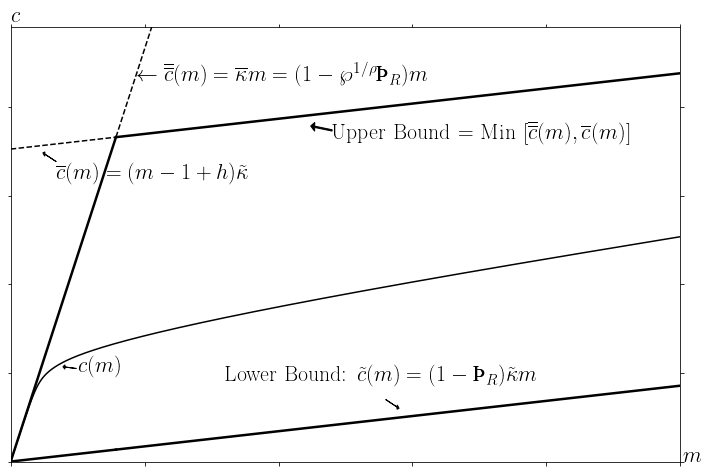

In [15]:
# Plot the consumption function and its bounds

cMaxLabel = r'$\overline{c}(m)= (m-1+h)\tilde{\kappa}$'
cMinLabel = r'Lower Bound: $\tilde{c}(m)= (1-\pmb{\text{\TH}}_{R})\tilde{\kappa}m$'
if not latexExists:
    cMaxLabel = r'$\overline{c}(m) = (m-1+h)mpc̲'  # Use unicode kludge
    cMinLabel = r'Lower Bound: c̲$(m)= (1-\Phi_{R})m = mpc̲ m$'

mPlotMin = 0.0
mPlotMax = 25
# mKnk is point where the two upper bounds meet
mKnk = ((h_inf-1) * mpc_Min)/((1 - UnempPrb**(1.0/CRRA)*(Rfree*DiscFac)**(1.0/CRRA)/Rfree)-mpc_Min)
mBelwKnkPts = 300
mAbveKnkPts = 700
mBelwKnk = np.linspace(mPlotMin, mKnk, mBelwKnkPts)
mAbveKnk = np.linspace(mKnk, mPlotMax, mAbveKnkPts)
mFullPts = np.linspace(mPlotMin, mPlotMax, mBelwKnkPts+mAbveKnkPts)

plt.figure(figsize=(12, 8))
cTopMult = 1.12
plt.plot(mFullPts, soln.cFunc(mFullPts), color="black")
plt.plot(mBelwKnk, cFunc_Uncnst(mBelwKnk), color="black", linestyle="--")
plt.plot(mAbveKnk, cFunc_Uncnst(mAbveKnk), color="black", linewidth=2.5)
plt.plot(mBelwKnk, cFunc_TopBnd(mBelwKnk), color="black", linewidth=2.5)
plt.plot(mAbveKnk, cFunc_TopBnd(mAbveKnk), color="black", linestyle="--")
plt.plot(mBelwKnk, cFunc_BotBnd(mBelwKnk), color="black", linewidth=2.5)
plt.plot(mAbveKnk, cFunc_BotBnd(mAbveKnk), color="black", linewidth=2.5)
plt.tick_params(labelbottom=False, labelleft=False, left='off',
                right='off', bottom='off', top='off')
plt.xlim(mPlotMin, mPlotMax)
plt.ylim(mPlotMin, cTopMult*cFunc_Uncnst(mPlotMax))
plt.text(mPlotMin, cTopMult*cFunc_Uncnst(mPlotMax)+0.05, "$c$", fontsize=22)
plt.text(mPlotMax+0.1, mPlotMin, "$m$", fontsize=22)
plt.text(2.5, 1, r'$c(m)$', fontsize=22, fontweight='bold')
upper_upper_bound_m = 4.6
if latexExists:
    plt.text(upper_upper_bound_m+0.1, cFunc_TopBnd(upper_upper_bound_m), r'$~\leftarrow \overline{\overline{c}}(m)= \overline{\MPC}m = (1-\UnempPrb^{1/\CRRA}\pmb{\text{\TH}}_{R})m$',
             fontsize=22, fontweight='bold')
else:
    plt.text(6, 5, r'$\overline{\overline{c}}(m)= \overline{\MPC}m = (1-\UnempPrb^{1/\CRRA}\Phi_{R})m$',
             fontsize=22, fontweight='bold')
upper_bound_m = 12
plt.text(
    upper_bound_m, cFunc_Uncnst(upper_bound_m)-0.3, r'Upper Bound $ = $ Min $[\overline{\overline{c}}(m),\overline{c}(m)]$', fontsize=22, fontweight='bold')
plt.text(8, 0.9, cMinLabel, fontsize=22, fontweight='bold')
lower_unc_bound_m = 1.7
lower_unc_bound_c = cFunc_Uncnst(lower_unc_bound_m)-0.2
plt.text(lower_unc_bound_m, lower_unc_bound_c-0.2, cMaxLabel, fontsize=22, fontweight='bold')
plt.arrow(2.45, 1.05, -0.5, 0.02, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(lower_unc_bound_m, lower_unc_bound_c, -0.5, 0.1, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(upper_bound_m, cFunc_Uncnst(upper_bound_m)-0.2, -0.8, 0.05, head_width=0.1, width=0.015,
          facecolor='black', length_includes_head='True')
unconst_m = 4.5
plt.arrow(5.95, 5.05, -0.4, mPlotMin, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(14, 0.70, 0.5, -0.1, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')

makeFig('cFuncBounds')

### [Upper and Lower Limits of the Marginal Propensity to Consume](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#MPCLimits)

The paper shows that as $m_{t}~\uparrow~\infty$ the consumption function in the presence of risk gets arbitrarily close to the perfect foresight consumption function.  Defining $\tilde{κ}$
as the perfect foresight model's MPC, this implies that $\lim_{m_{t}~\uparrow~\infty} c^{\prime}(m) = \tilde{\kappa}$.

The paper also derives an analytical limit $\bar{\MPC}$ for the MPC as $m$ approaches 0., its bounding value.  Strict concavity of the consumption function implies that the consumption function will be everywhere below a function $\bar{\MPC}m$, and strictly declining everywhere.  The last figure plots the MPC between these two limits.


Saving figure MPCLimits in ../../Figures


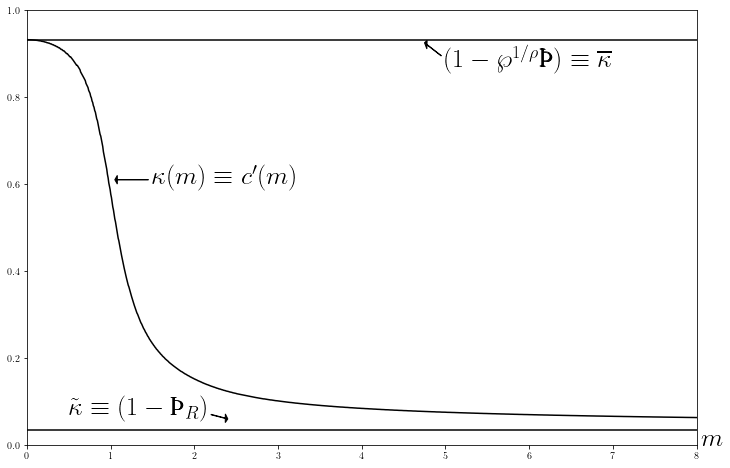

In [16]:
# The last figure shows the upper and lower limits of the MPC

mPlotMax = 8

plt.figure(figsize=(12, 8))
# Set the plot range of m
m = np.linspace(0.001, mPlotMax, mPts)

# Use the HARK method derivative to get the derivative of cFunc, and which constitutes the MPC
MPC = soln.cFunc.derivative(m)

# Define the upper bound of MPC
#mpc_Max = (1 - UnempPrb ** (1.0/CRRA)*(R*DiscFac)**(1.0/CRRA)/R)

# Define the lower bound of MPC
#MPCLower = mpc_Min

kappaDef = r'$\tilde{\kappa}\equiv(1-\pmb{\text{\TH}}_{R})$'
if not latexExists:
    kappaDef = r'κ̲$\equiv(1-\Phi_{R})$'

plt.plot(m, MPC, color='black')
plt.plot([mPlotMin, mPlotMax], [mpc_Max, mpc_Max], color='black')
plt.plot([mPlotMin, mPlotMax], [mpc_Min, mpc_Min], color='black')
plt.xlim(mPlotMin, mPlotMax)
plt.ylim(0, 1)  # MPC bounds are between 0 and 1
plt.text(1.5, 0.6, r'$\MPC(m) \equiv c^{\prime}(m)$', fontsize=26, fontweight='bold')
if latexExists:
    plt.text(5, 0.87, r'$(1-\UnempPrb^{1/\CRRA}\pmb{\text{\TH}})\equiv \overline{\MPC}$',
             fontsize=26, fontweight='bold')  # Use Thorn character
else:
    plt.text(5, 0.87, r'$(1-\UnempPrb^{1/\CRRA}\Phi_{R})\equiv \overline{\MPC}$',
             fontsize=26, fontweight='bold')  # Use Phi instead of Thorn (alas)

plt.text(0.5, 0.07, kappaDef, fontsize=26, fontweight='bold')
plt.text(mPlotMax+0.05, mPlotMin, "$m$", fontsize=26)
plt.arrow(1.45, 0.61, -0.4, mPlotMin, head_width=0.02, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(2.2, 0.07, 0.2, -0.01, head_width=0.02, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(4.95, 0.895, -0.2, 0.03, head_width=0.02, width=0.001,
          facecolor='black', length_includes_head='True')

makeFig('MPCLimits')

# Summary

[Two tables in the paper](https://econ-ark.github.io/BufferStockTheory/#Factors-Defined-And-Compared) summarize the various definitions, and then articulate conditions required for the problem to have a nondegenerate solution.  Among the nondegenerate cases, the most interesting result is that if the Growth Impatience Condition holds there will be a target level of wealth.

### Appendix: Options for Interacting With This Notebook <a id='optionsForInstalling'></a>

1. [View (static version)](https://github.com/llorracc/BufferStockTheory/blob/master/Code/Python/BufferStockTheory.ipynb) on GitHub (warning:  GitHub does not render Jupyter notebooks reliably)
1. [Launch Online Interactive Version](https://econ-ark.org/materials/BufferStockTheory/#launch)
1. For fast (local) execution, install [econ-ark](http://github.com/econ-ark) on your computer ([QUICK START GUIDE](https://github.com/econ-ark/HARK/blob/master/README.md)) then follow these instructions to retrieve the full contents of the `BufferStockTheory` [REMARK](https://github.com/econ-ark/REMARK):
   1. At a command line, change the working directory to the one where you want to install
       * On unix, if you install in the `/tmp` directory, the installation will disappear after a reboot:
       * `cd /tmp`
   1. `git clone https://github.com/econ-ark/REMARK --recursive`
   1. `cd REMARK/REMARKs/BufferStockTheory`
   1. `jupyter notebook BufferStockTheory.ipynb`

### Appendix: Perfect foresight agent failing both the FHWC and RIC

................................................................................................................................................................................................................................................................................................................................................................................................................
Saving figure PFGICRawHoldsFHWCFailsRICFails in ../../Figures


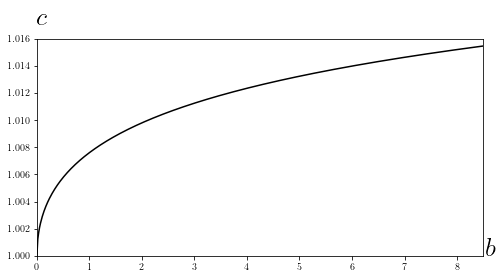

In [17]:
PFGICRawHoldsFHWCFailsRICFails_par = deepcopy(init_perfect_foresight)

# Replace parameters.
PFGICRawHoldsFHWCFailsRICFails_par['Rfree'] = 0.98
PFGICRawHoldsFHWCFailsRICFails_par['DiscFac'] = 1.0
PFGICRawHoldsFHWCFailsRICFails_par['PermGroFac'] = [0.99]
PFGICRawHoldsFHWCFailsRICFails_par['CRRA'] = 2
PFGICRawHoldsFHWCFailsRICFails_par['BoroCnstArt'] = 0.0
PFGICRawHoldsFHWCFailsRICFails_par['T_cycle'] = 1  # No seasonal cycles
PFGICRawHoldsFHWCFailsRICFails_par['T_retire'] = 0
PFGICRawHoldsFHWCFailsRICFails_par['cycles'] = 400  # This many periods
PFGICRawHoldsFHWCFailsRICFails_par['MaxKinks'] = 400
PFGICRawHoldsFHWCFailsRICFails_par['quiet'] = False
PFGICRawHoldsFHWCFailsRICFails_par['BoroCnstArt'] = 0.0    # Borrowing constraint
PFGICRawHoldsFHWCFailsRICFails_par['LivPrb'] = [1.0]

# Create the agent
HWRichButReturnPatientPFConstrainedAgent = \
    PerfForesightConsumerType(**PFGICRawHoldsFHWCFailsRICFails_par,
                              quietly=True
                              )
# Solve and report on conditions
this_agent = HWRichButReturnPatientPFConstrainedAgent
this_agent.solve(quietly=False, messaging_level=logging.DEBUG)

# Plot
mPlotMin, mPlotMax = 1, 9.5
plt.figure(figsize=(8, 4))
m_grid = np.linspace(mPlotMin, mPlotMax, 500)
plt.plot(m_grid-1, this_agent.solution[0].cFunc(m_grid), color="black")
plt.text(mPlotMax-1+0.05, 1, r"$b$", fontsize=26)
plt.text(mPlotMin-1, 1.017, r"$c$", fontsize=26)
plt.xlim(mPlotMin-1, mPlotMax-1)
plt.ylim(mPlotMin, 1.016)

makeFig('PFGICRawHoldsFHWCFailsRICFails')